<a href="https://www.kaggle.com/code/leokaka/reinforcement-learning-basics?scriptVersionId=268611107" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 1. Learning basics of RL
### Reinforcement Learning Example: Robot Navigation in a Maze

Assume that we are building a robot that can find a path from a source to a target in a maze.  
We aim to use **Reinforcement Learning (RL)** to accomplish this task.

Here:

- **Environment:** The maze itself.  
- **Actions:** At each step, the robot can move **up**, **down**, **left**, or **right**.  
- **State:** The environment’s condition after performing an action. For example, if the robot moves to the left, it reaches a new state representing its updated position in the maze.  
- **Reward:** After taking an action, the robot receives a reward that reflects the desirability of the resulting state.

Example:

Let's use a simple scenario where the maze is a 2x3 matrix.

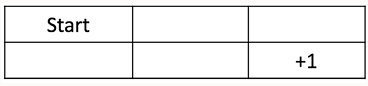

We can further visualize the possible movements of the robot in the maze as following:
- 0,1 are rewards for robot when it takes an action.
- X is impossible action.

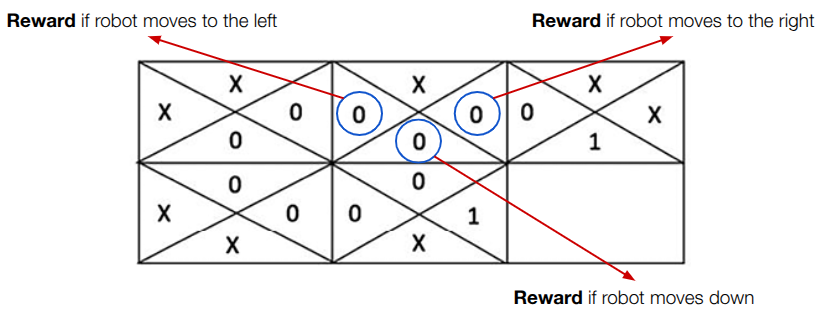

We can see that if we want to guide the robot to the target, which has a reward of **1**, we need to create a **policy** that encourages it to move toward the goal — i.e., to maximize the total reward. To achieve this, we may need to **incentivize** the robot at each step.  
This can be done by defining the following rules:

*value of action taken in a state* = *reward of moving to the next cell*  + γ × *value of the best possible action in the next state* (1).

> **Note:** During the ***learning process***, we do not yet know the *value of the best possible action in the next state*, nor do we know which action is optimal for each state.  
> If we already knew these values, there would be no need to train the robot in the first place!

Instead, we will take the mean of all possible actions in the next state.
For example,
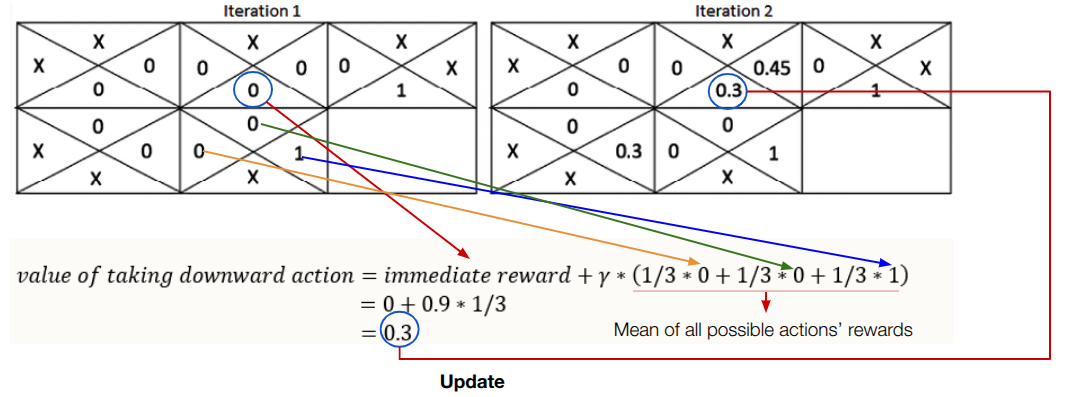

Now, we have enough theoretical foundation to train a robot to find path in the maze. However, we can convert the update equation (1) to minimization problem by move everythings to the right hand side:

*Value of action taken in a state* ← *Value of action taken in a state* + α × ( *Reward of moving to the next state* + γ × *Value of the best possible action in the next state* − *Value of action taken in a state* ) (2)

---

Let's call:

δ = (*Reward of moving to the next state* + γ × *Value of the best possible action in the next state* − *Value of action taken in a state* )

The (2) can be rewritten as:

*Value of action taken in a state* ← *Value of action taken in a state* + αδ

---

Now, we have established enough theoretical foundation to train a robot to find a path in the maze.  
However, we can convert the update equation (1) into a **minimization problem** by moving all terms to the right-hand side:

*Value of action taken in a state* ← *Value of action taken in a state* + α × ( *Reward of moving to the next state* + γ × *Value of the best possible action in the next state* − *Value of action taken in a state* ) (3)

Let's define the **temporal difference (TD) error** as:

δ = ( *Reward of moving to the next state* + γ × *Value of the best possible action in the next state* − *Value of action taken in a state* )

Using this notation, equation (3) can be rewritten as:

*Value of action taken in a state* ← *Value of action taken in a state* + αδ

Here, we can see that by repeatedly applying this update, the *Value of action taken in a state* will eventually converge — that is, δ becomes very small.  
The term **α** is introduced as the **learning rate**.

---

### 🔹 α (Alpha): Learning Rate

$0 < \alpha \leq 1$

It controls how strongly **new information overrides old knowledge**.

---

### 🔹 Intuitive Meaning

Think of **α** as *how much you trust new experience compared to what you already know.*

- **Small α (e.g., 0.1)**  
  → Learning is slow; updates are small.  
  → Past experience dominates (stable but slow convergence).

- **Large α (e.g., 0.9)**  
  → Learning is fast; new observations have a strong influence.  
  → The agent adapts quickly — but may forget previous useful estimates or overreact to noise.


# Q-learning
If you read the above, it is exactly the ***Q-learning***.

**Q-learning (definition)**  
*Value of action taken in a state* = *Reward of moving to the next cell* + γ × *Value of the best possible action in the next state*

**Q-learning (update rule)**  
*Value of action taken in a state* ← *Value of action taken in a state* + α × ( *Reward of moving to the next state* + γ × *Value of the best possible action in the next state* − *Value of action taken in a state* )

Q(s,a) = R(s,a) + γ · max_a' Q(s', a')

Q(s,a) ← Q(s,a) + α · ( R(s,a) + γ · max_a' Q(s', a') − Q(s,a) )

### 🔹 1. Bellman Optimality Equation

\[
Q(s, a) = R(s, a) + \gamma \cdot \max_{a'} Q(s', a')
\]

This equation defines the **optimal action-value function** — it describes what the value of taking action `a` in state `s` *should be*, assuming the agent acts optimally thereafter.

**Notations:**

| Symbol | Meaning |
|:--------|:---------|
| **Q(s, a)** | The **action-value function** (or *Q-value*) — expected total reward when the agent starts in state `s`, takes action `a`, and follows the optimal policy thereafter. |
| **R(s, a)** | The **immediate reward** received after taking action `a` in state `s`. |
| **γ (gamma)** | The **discount factor**, where \(0 \le \gamma < 1\); determines how much future rewards are valued compared to immediate rewards. A smaller γ makes the agent short-sighted; a larger γ encourages long-term planning. |
| **s′ (s-prime)** | The **next state** reached after performing action `a` in state `s`. |
| **a′ (a-prime)** | The **next action** that could be taken in the next state `s′`. |
| **maxₐ′ Q(s′, a′)** | The **maximum future Q-value** across all possible next actions — represents the *best possible future outcome* from the next state. |

---

### 🔹 2. Q-learning Update Rule

\[
Q(s,a) \leftarrow Q(s,a) + \alpha \cdot ( R(s,a) + \gamma \cdot \max_{a'} Q(s', a') - Q(s,a) )
\]

This is the **learning version** of the Bellman equation — instead of defining the true Q-values, it **iteratively updates estimates** based on experience.

**Notations:**

| Symbol | Meaning |
|:--------|:---------|
| **←** | “Update” or “assign new value to” — indicates that we replace the old Q-value with an updated one. |
| **α (alpha)** | The **learning rate**, \(0 < \alpha \le 1\); controls how strongly new information overrides old knowledge. A large α → faster learning but less stable; a small α → slower but more stable. |
| **( R(s,a) + γ · maxₐ′ Q(s′,a′) − Q(s,a) )** | This is called the **Temporal Difference (TD) error**, denoted δ — it measures how far the current estimate \(Q(s,a)\) is from the new target. |

---

### 🔹 Intuitive Summary

- The **first equation** defines the *ideal relationship* between rewards and Q-values (it’s a theoretical target).  
- The **second equation** shows *how we learn* those Q-values iteratively — by nudging our current estimates \(Q(s,a)\) toward the target using the learning rate α.

---



# Coding Time

Let's use a maze from gym from OpenAI to consolidate our theoretical formulas

In [ ]:
%pip install "gym==0.26.2"

In [ ]:
import numpy as np
import gym
import random
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

environment = gym.make('FrozenLake-v1', is_slippery=False, render_mode='rgb_array')
environment.reset()


frame = environment.render()
plt.imshow(frame)
plt.axis("off")
plt.show()

In [ ]:
# Get the initial reward and transition probabilities of frozen lake
environment.P

If we check the above outputs, they may seem confusing:

0: {0: [(1.0, 0, 0.0, False)],
   1: [(1.0, 4, 0.0, False)],
   2: [(1.0, 1, 0.0, False)],
   3: [(1.0, 0, 0.0, False)]},
1: {0: [(1.0, 0, 0.0, False)], ... }

Each data row denotes for (probability, next_state, reward, done)

For example,  
`1: [(1.0, 4, 0.0, False)]` denotes that we can move from state **0** to state **4** with a probability of **1.0**.  
The probability here means that, since `is_slippery=False`, the agent will **definitely** reach cell **4** (a deterministic transition).

In [ ]:
# Initialize the Q-table with zeros
action_size = environment.action_space.n
state_size = environment.observation_space.n
qtable = np.zeros((state_size, action_size))
action_size, state_size, qtable.shape

In [ ]:
learning_rate = 0.1 # define alpha
gamma = 0.9 # define gamma

In [ ]:
import numpy as np
if not hasattr(np, "bool8"):
    np.bool8 = np.bool_

In [ ]:
# Play multiple episodes while taking a random action
episode_rewards = []
for i in range (10000):
  # Reset the environment each episode
  state, *_ = environment.reset()
  total_rewards = 0
  # We limit number of steps for each episode, otherwise it would be the case which the robot never reach target because of random choice each iteration.
  for step in range(50): 
    # We randomly choose a number from {0,1,2,3} denotes for {up, down, right, left}
    action = environment.action_space.sample()
    new_state, reward, finish, *_ = environment.step(action)
    qtable[state][action] += learning_rate * (reward + gamma * np.max(qtable[new_state]) - qtable[state][action])
    total_rewards += reward
    if finish:
      break
    state = new_state
  episode_rewards.append(total_rewards)
qtable, max(episode_rewards)

At first, it might seem confusing that we use the **maximum** value in this equation:

`qtable[state][action] += learning_rate * (reward + gamma * np.max(qtable[new_state]) - qtable[state][action])`

because during training, the agent actually takes **random actions** most of the time — especially at the beginning!

So why use `max()` instead of an average of all possible actions?

The key idea is this:

- When the agent *acts* during learning, it often explores randomly (to try different paths).  
- But when the agent *updates* its Q-table, it learns **as if** it had taken the *best possible* next action.  

That means:
> “Even though I’m moving randomly right now, I’ll assume that in the future, I’ll act optimally — and I’ll learn toward that.”

The `max(qtable[new_state])` term represents the **best possible future value** from the next state. By using this maximum, we are teaching the agent to aim for the **highest future reward**, even while it’s still exploring.

If we used the average (mean), the agent would assume that all actions are equally good — that would make it learn much slower and might prevent it from ever finding the optimal path.

So, in short:
> We explore randomly, but we **learn optimistically** — assuming that we’ll eventually act in the best possible way.


# It's time to test our trained robot

In [ ]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

state, *_ = environment.reset()
step = 0
finish = False
# We still need to put the limit here to make sure that our robot learns nothing
for step in range(50):
  # Visualize the position of the robot in each step
  frame = environment.render()
  plt.imshow(frame)
  plt.axis("off")
  plt.show()
  # Take action based on value from obtained Q-table
  action = np.argmax(qtable[state])
  new_state, reward, finish, *_ = environment.step(action)
  if finish:
    print(f"Number of steps: {step + 1}")
    break
  state = new_state
environment.close()